# Variables categóricas

Una variable categórica, como su nombre indica, se utiliza para representar categorías o etiquetas. Por ejemplo, una variable categórica podría representar las principales ciudades del mundo, las cuatro estaciones en un año o la industria (petróleo, viajes, tecnología) de una empresa. El número de valores de categoría es siempre finito en un conjunto de datos del mundo real. Los valores se pueden representar numéricamente. Sin embargo, a diferencia de otras variables numéricas, los valores de una variable categórica no se pueden ordenar entre sí. (El petróleo no es mayor ni menor que los viajes como tipo de industria). Se denominan "no ordinales".


Una simple pregunta puede servir como prueba de fuego para determinar si algo debe ser una variable categórica o no: "¿Importa cuán diferentes son dos valores, o solo que son diferentes?" El precio de una acción de 500€ es cinco veces más alto que un precio de una de 100€. Entonces, el precio de las acciones debe estar representado por una variable numérica continua. La industria de la empresa (petróleo, viajes, tecnología, etc.), por otro lado, probablemente debería ser categórica.

Las grandes variables categóricas son particularmente comunes en los registros transaccionales. Por ejemplo, muchos servicios web rastrean a los usuarios mediante un ID, que es una variable categórica con cientos o cientos de millones de valores, según la cantidad de usuarios únicos del servicio. La dirección IP de una transacción por Internet es otro ejemplo de una gran variable categórica. Son variables categóricas porque, aunque las ID de usuario y las direcciones IP son numéricas, su magnitud generalmente no es relevante para la tarea en cuestión. Por ejemplo, la dirección IP puede ser relevante cuando se realiza detección de fraude en transacciones individuales; algunas direcciones IP o subredes pueden generar más transacciones fraudulentas que otras. Pero la subred 164.203.x.x no tiene por qué ser intrínsecamente más fraudulenta que 164.202.x.x; el valor numérico de la subred no importa.

El vocabulario de un corpus de documentos se puede interpretar como una gran variable categórica, siendo las categorías palabras únicas. Puede resultar computacionalmente costoso representar tantas categorías distintas. Si una categoría (por ejemplo, palabra) aparece varias veces en un punto de datos (documento), entonces podemos representarla como un recuento y representar todas las categorías a través de sus estadísticas de recuento. Esto se llama _bin counting_ (algo así como "recuento de contenedores").

Comenzaremos este notebook con representaciones comunes de variables categóricas, y terminaremos estudiando el recuento de contenedores (grupos o bins) para grandes variables categóricas, que son muy comunes en los conjuntos de datos modernos.


# Encoding de Variables Categóricas

Las categorías o niveles de una variable categórica generalmente no son numéricas. Por ejemplo, el color de ojos puede ser "negro", "azul", "marrón", etc. Por lo tanto, se necesita un método de codificación para convertir estas categorías no numéricas en números, que será lo único que entienda nuestro algoritmo. Es tentador simplemente asignar un número entero, digamos de 1 a k (siendo k el número total de categorías posibles), pero los valores resultantes se podrían ordenar entre sí, lo que no debería ser permisible para las categorías, ya que les estaríamos imponiendo un orden que no es tal. Entonces, ¿qué podemos hacer? Veamos algunas alternativas.


## One-Hot Encoding

Una alternativa mucho mejor sería utilizar un grupo de bits para representar cada variable categórica. Cada bit representará una categoría posible. Si la variable no puede pertenecer a varias categorías a la vez, entonces solo un bit en el grupo podrá estar "activado" (es decir, si solo puede tomar uno de los posibles valores, como nos hemos creado una columna por cada variable, pues solo tendrá una columna con valor 1 y el resto serán 0). Esto se llama "One-Hot Encoding", y está implementado en scikit-learn (``sklearn.preprocessing.OneHotEncoder``), por lo que nos facilitará mucho las cosas. Cada uno de los bits es una característica diferente, por lo tanto, una variable categórica con k categorías posibles se codificará como un vector de características de longitud k, lo que dará lugar a k columnas con valores 0/1 (donde, en el típico caso en el que cada varaible solo puede tomar una de las categorías posibles, solo podrá tener 1 una de ellas).

A continuación, se recoge un ejemplo de esta codificación:

 <img src="https://miro.medium.com/max/2474/1*ggtP4a5YaRx6l09KQaYOnw.png"> 

La codificación One-Hot Encoding es muy simple de entender, pero usa un bit más de lo estrictamente necesario. Si vemos que k – 1 de los bits son 0, entonces el último bit debe ser 1 porque la variable debe tomar uno de los k valores. Matemáticamente, se puede escribir esta restricción como "la suma de todos los bits debe ser igual a 1":
$e_1 + e_2 + ... + e_k = 1$

Por lo tanto, tenemos una dependencia lineal en nuestras manos. Las características dependientes lineales, son un poco molestas porque significan que los modelos lineales entrenados no serán únicos. Diferentes combinaciones lineales de las características pueden hacer las mismas predicciones, por lo que necesitaríamos realizar pasos adicionales para comprender el efecto de una característica en la predicción.

Esto se conoce como "Dummy Trap Variable", y es un gran problema. Veamoms un ejemplo:

Supongamos que tenemos un dataset sobre personas que está compuesto por dos variables: A y B, donde A es el número de varones y la B indica el número de mujeres. En este caso, como una persona solo puede tomar valores hombre o mujer (en este dataset supuesto en concreto, sí), podemos ver claramente que: 

$A+B=1$ y $B=1-A$

Esto significa que las columnas A y B son columnas _colineales_, es decir, que una se puede expresar como combinación lineal de la otra.


Además, tenemos una variable C que queremos predecir a partir de la combinación lineal de A y B, representada por la siguiente ecuación:

$C = W_0 + W_1·A + W_2·B$

El modelo, por tanto, tendrá que calcular los valores de $W_0$, $W_1$ y $W_2$ para hacer posible esta relación.

Si aplicamos matemáticas a nuestro problema:

$C = W_0 + W_1·A + W_2·(1-A) = W_0 + W_2 + (W_1-W_2)·A$

$C = W_0 + W_1·(1-B) + W_2·B = W_0 + W_1 + (W_2-W_1)·B$

Lo que nos termina llevando a una solución múltiple:

$(W_0, W_1, W_2) = (1, 2, 3) = (4, -1, 0) = (3, 0, 1)$




## Codificación Dummy

El problema con la codificación One-Hot Encoding es que permite k grados de libertad, mientras que la variable en sí solo necesita k – 1. La codificación Dummy elimina ese grado adicional de libertad al usar solo k – 1 características en la representación, asignando una de las categorías como un vector con todo 0. Esta categoría se define como categoría de referencia. Tanto la codificación Dummy como la codificación One-Hot Encoding se implementan en Pandas como pandas.get_dummies.

El resultado del modelado con codificación Dummy es más interpretable que con la One-Hot Encoding. Esto es fácil de ver en un problema de regresión lineal simple. Supongamos que tenemos algunos datos sobre los precios de alquiler de apartamentos en tres ciudades: San Francisco, Nueva York y Seattle.

En este caso vamos a dejar que Python calcule por nosotros la recta que mejor se adapte a nuestros datos para predecir el valor del precio. Esta será nuestra primera aproximación a lo que son los algoritmos de predicción, pero lo veremos con mucho mayor detalle cuando emntremos en el siguiente bloque. Básicamente, lo que hará el algoritmo será obtener los coeficientes por los que multiplicar cada una de las variables de entrada para obtener el precio, tal como muestra la siguiente ecuación:



donde $X_p$ son las variables de nuestro dataset (en este caso, la ciudad).

Para ello, utilizaremos el objeto ``linear_model.LinearRegression()``, pero lo que más nos interesa en este caso es ver el grado de libertad que limita la codificación Dummy respecto al One-Hot Encoder

In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


#### One-Hot Encoder

In [3]:
one_hot_df = pd.get_dummies(df, prefix=['city'])

one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [4]:
lin_reg = linear_model.LinearRegression()

In [5]:
lin_reg.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])

LinearRegression()

Sacamos los coeficientes y el valor de la constante que marcarán la ecuación que defina nuestro modelo:

In [6]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [7]:
lin_reg.intercept_

3333.3333333333335

In [8]:
# One-hot encoding weights + intercept
w1 = lin_reg.coef_
b1 = lin_reg.intercept_

In [9]:
df['Rent'].mean()

3333.3333333333335

In [10]:
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [11]:
lin_reg.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])

LinearRegression()

In [12]:
lin_reg.coef_

array([  500., -1000.])

In [13]:
lin_reg.intercept_

3500.0000000000005

In [14]:
# Dummy coding weights + intercept
w2 = lin_reg.coef_
b2 = lin_reg.intercept_

In [15]:
# illustration of rental price in cities
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4, color_codes=True)

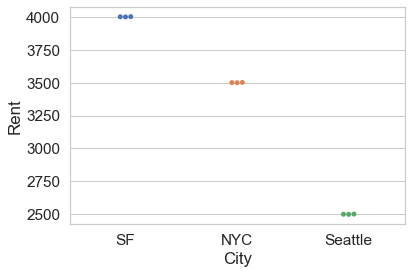

In [16]:
sns.swarmplot(x="City", y="Rent", data=df);

In [17]:
print('One-hot encoding weights: ' ,w1, ' and intercept: ', b1)
print('Dummy encoding weights: ' ,w2, ' and intercept: ', b2)

One-hot encoding weights:  [ 166.66666667  666.66666667 -833.33333333]  and intercept:  3333.3333333333335
Dummy encoding weights:  [  500. -1000.]  and intercept:  3500.0000000000005


In [18]:
# Vemos cómo se ajustan a los datos que tenemos:

# Create a list of values in the best fit line for one-hot encoding
one_hot_y = [((w1[0] * one_hot_df.city_NYC[i]) + 
              (w1[1] * one_hot_df.city_SF[i]) +
              (w1[2] * one_hot_df.city_Seattle[i]) + b1) 
             for i in range(0,one_hot_df.shape[0])]

# Create a list of values in the best fit line for dummy coding
dummy_y = [((w2[0] * dummy_df.city_SF[i]) +
            (w2[1] * dummy_df.city_Seattle[i]) + b2)
           for i in range(0,dummy_df.shape[0])]

print(one_hot_y)
print(dummy_y)

[4000.0000000000005, 4000.0000000000005, 4000.0000000000005, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]
[4000.0, 4000.0, 4000.0, 3500.0000000000005, 3500.0000000000005, 3500.0000000000005, 2500.0000000000005, 2500.0000000000005, 2500.0000000000005]


Como podemos ver, las predicciones son prácticamente iguales, solo que con la codificación Dummy tenemos un nivel menos, lo que es más entendible.


### EJERCICIO

Prueba ahora a realizar las codificaciones Dummy y One-Hot sobre las columnas del dataset de Titanic que creas oportunas. Recuerda que la función ``get_dummies()`` solo trabaja con variables ``object``, por lo que quizás tengas que hacer alguna conversión de datos.

In [19]:
import pandas as pd

df = pd.read_csv("../../data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
# Sacamos los tipos:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
# Como podemos ver, podemos identificar algunas variables categóricas que no son object, y algunas object que no tiene sentido codificar:
encode_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Cabin", "Embarked"]

for col in encode_cols:
    df[col] = df[col].astype(str).fillna('')

In [22]:
dummy_df = pd.get_dummies(df[encode_cols], prefix=encode_cols, drop_first=True)
dummy_df

,Survived_1,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_Q,Embarked_S,Embarked_nan
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
887,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
888,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
889,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
one_hot_df = pd.get_dummies(df[encode_cols], prefix=encode_cols)
one_hot_df

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
887,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
888,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
889,0,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Pros y Contras de los Encodings de Variables Categóricas


One-hot Encoding y Dummy Encoding son muy similares entre sí. Cada uno tiene sus pros y sus contras. La codificación One-Hot Encoding es redundante, lo que permite múltiples modelos válidos para el mismo problema. La falta de singularidad es a veces problemática para la interpretación, pero la ventaja es que cada característica corresponde claramente a una categoría. Además, los datos nulos se pueden codificar como el vector de todo ceros, y la salida debe ser la media general de la variable objetivo.

A raíz de la codificación Dummy, se puede obtener la codificación de efecto, que consiste en cambiar los 0 por -1, dejando la posibilidad de diferenciar cuándo tenemos datos nulos. La codificación Dummy y la codificación de efectos no son redundantes. Dan lugar a modelos únicos e interpretables. La desventaja de la codificación Dummy es que no puede manejar fácilmente los datos nulos, ya que el vector de todos ceros ya está asignado a la categoría de referencia. También codifica el efecto de cada categoría en relación con la categoría de referencia, lo que puede parecer extraño.

La codificación de efecto evita este problema al usar un código diferente para la categoría de referencia, pero el vector de todos los –1 es un vector denso (ocupa más espacio que uno de 0 por cómo se hacen las cosas internamente, ya que hacer operaciones con -1 será más costosos que con 0), que es costoso tanto para el almacenamiento como para el cálculo. Por esta razón, los paquetes de software ML populares como Pandas y scikit-learn han optado por la codificación Dummy o la codificación One-Hot Encoding en lugar de la codificación de efecto.

Las tres técnicas de codificación se rompen cuando el número de categorías se vuelve muy grande. Se necesitan diferentes estrategias para manejar variables categóricas extremadamente grandes.




## Manejando variables categóricas extremadamente grandes

La recopilación automatizada de datos en Internet puede generar grandes variables categóricas. Esto es común en aplicaciones como la publicidad dirigida y la detección de fraudes.

En la publicidad dirigida, la tarea es hacer coincidir a un usuario con un conjunto de anuncios. Las características incluyen el ID del usuario, el dominio del sitio web para el anuncio, la consulta de búsqueda y la página actual. (La consulta es una cadena de texto que se puede dividir y convertir en las características de texto habituales. Sin embargo, las consultas suelen ser breves y suelen estar compuestas por frases, por lo que la mejor solución será mantenerlas intactas o pasarlas a través de una función hash para facilitar el almacenamiento y las comparaciones. Discutiremos el hash con más detalle más adelante.) Cada una de estas es una variable categórica muy grande. El desafío es encontrar una buena representación de características que sea eficiente en memoria, pero que produzca modelos precisos que sean rápidos de entrenar.

Principalmente, tenemos los siguientes modos de actuación:

    - No hacer nada especial con la codificación. Utilizar un modelo sencillo que sea barato de entrenar, y alimentarlo con la codificación One-Hot en un modelo lineal (regresión logística o máquina de vectores de soporte lineal) en muchas máquinas.
    - Comprimir las funciones. Hay dos opciones:
        1. Función hash: popular entre los modelos lineales
        2. Bin counting (Conteo de agrupaciones): popular entre modelos lineales y árboles de decisión (lo veremos)


## Función hash

Una función hash es una función determinista que asigna un número entero potencialmente ilimitado a un rango de enteros finito [1, m]. Dado que el dominio de entrada es potencialmente mayor que el rango de salida, es posible que se asignen varios números a la misma salida. A esto se le llama colisión. Una función hash uniforme asegura que se mapee aproximadamente el mismo número de números en cada uno de los m contenedores.

Visualmente, podemos pensar en una función hash como una máquina que toma bolas numeradas (keys en la Figura) y las encamina a uno de los m contenedores (hashes en la Figura). Las bolas con el mismo número siempre se enviarán al mismo contenedor. Esto mantiene el espacio de funciones al tiempo que reduce el tiempo de almacenamiento y procesamiento durante los ciclos de capacitación y evaluación del aprendizaje automático.

Se pueden construir funciones hash para cualquier objeto que se pueda representar numéricamente (lo cual es cierto para cualquier dato que se pueda almacenar en una computadora): números, cadenas, estructuras complejas, etc.


![texto alternativo](https://drive.google.com/uc?id=1cTY_mxkTAS33w9ck-Pn_8v67LspVGnTe)

La codificación mediante función hash se puede utilizar para modelos que involucran el producto escalar de los vectores de características y coeficientes, como modelos lineales y métodos de kernel. Es muy utilizado para filtrar spam, donde está más que contrastado (Weinberger et al., 2009). En el caso de la publicidad dirigida, McMahan et al. (2013) informan que no se pueden reducir los errores de predicción a un nivel aceptable a menos que ``m`` sea del orden de miles de millones, lo que no constituye un ahorro de espacio suficiente.

Una desventaja del _hashing_ es que las columnas _hasheadas_, al ser agregados de variables originales, ya no se pueden interpretar.

A continuación, utilizaremos un conjunto de datos con reseñas de Yelp para demostrar las compensaciones de almacenamiento e interpretación mediante FeatureHasher de scikit-learn.

In [24]:
import pandas as pd
import json

In [30]:
review_df = pd.read_csv("../../data/yelp_academic_dataset_review.csv")
review_df.head()

,votes,user_id,review_id,stars,date,text,type,business_id
0,"{'funny': 0, 'useful': 5, 'cool': 2}",rLtl8ZkDX5vH5nAx9C3q5Q,fWKvX83p0-ka4JS3dc6E5A,5,2011-01-26,My wife took me here on my birthday for breakf...,review,9yKzy9PApeiPPOUJEtnvkg
1,"{'funny': 0, 'useful': 0, 'cool': 0}",0a2KyEL0d3Yb1V6aivbIuQ,IjZ33sJrzXqU-0X6U8NwyA,5,2011-07-27,I have no idea why some people give bad review...,review,ZRJwVLyzEJq1VAihDhYiow
2,"{'funny': 0, 'useful': 1, 'cool': 0}",0hT2KtfLiobPvh6cDC8JQg,IESLBzqUCLdSzSqm0eCSxQ,4,2012-06-14,love the gyro plate. Rice is so good and I als...,review,6oRAC4uyJCsJl1X0WZpVSA
3,"{'funny': 0, 'useful': 2, 'cool': 1}",uZetl9T0NcROGOyFfughhg,G-WvGaISbqqaMHlNnByodA,5,2010-05-27,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,_1QQZuf4zZOyFCvXc0o6Vg
4,"{'funny': 0, 'useful': 0, 'cool': 0}",vYmM4KTsC8ZfQBg-j5MWkw,1uJFq2r5QfJG_6ExMRCaGw,5,2012-01-05,General Manager Scott Petello is a good egg!!!...,review,6ozycU1RpktNG2-1BroVtw


In [31]:
# we will define m as equal to the unique number of business_id
m = len(review_df.business_id.unique())
print(m)

4174


In [32]:
from sklearn.feature_extraction import FeatureHasher

In [33]:
h = FeatureHasher(n_features=m, input_type='string')
f = h.transform(review_df['business_id'])

In [34]:
# Podemos sacar los tamaños que ocupan en memoria
from sys import getsizeof

print('Our pandas Series, in bytes: ', getsizeof(review_df['business_id']))
print('Our hashed numpy array, in bytes: ', getsizeof(f))

Our pandas Series, in bytes:  790144
Our hashed numpy array, in bytes:  48


In [35]:
review_df['business_id'].unique().tolist()[0:5]

['9yKzy9PApeiPPOUJEtnvkg',
 'ZRJwVLyzEJq1VAihDhYiow',
 '6oRAC4uyJCsJl1X0WZpVSA',
 '_1QQZuf4zZOyFCvXc0o6Vg',
 '6ozycU1RpktNG2-1BroVtw']

In [36]:
f.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### EJERCICIO

Ahora te toca a ti. Vuelve a leer el dataset del Titanic y codifica con la función hash aquellas variables categóricas que tengan mucha variación (tendrás que quedarte con tantos objetos como variables codifiques). ¿Qué tamaño tienen las columnas transformadas antes de la transformación (Series)? ¿Y tras ella?

In [37]:
import pandas as pd

df = pd.read_csv("../../data/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
# Sacamos las columnas categóricas con mayor variacion (y que tengan repetidos):
hcat_cols = ["Ticket", "Cabin"]

f = []

for col in hcat_cols:
    df[col] = df[col].fillna('')
    m = len(df[col].unique())
    h = FeatureHasher(n_features=m, input_type='string')
    f.append(h.transform(df[col]))

In [39]:
print("Función Hash: " + str(sum([getsizeof(f_i) for f_i in f])))
print("Columnas originales: " + str(sum([getsizeof(df[col]) for col in hcat_cols])))

Función Hash: 96
Columnas originales: 109999
